<a href="https://colab.research.google.com/github/quvyshnav/Data-Analysis/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install opendatasets --upgrade --quiet

# US Accidents Exploratory Data Analysis

TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)
  - Kaggle
  - informaiton about accidents
  - can use useful to prevent accidents
  - mention that this does not contain data about New York

In [4]:
import opendatasets as od

dwnld_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dwnld_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [5]:
dwnld_url = 'https://www.kaggle.com/datasets/girishwaran/us-accidents-from-2016-to-2020?select=US_Accidents_June20.csv'
od.download(dwnld_url)

Skipping, found downloaded files in "./us-accidents-from-2016-to-2020" (use force=True to force download)


In [6]:
data_file = './us-accidents/US_Accidents_March23.csv'

data = './us-accidents-from-2016-to-2020/US_Accidents_June20.csv'

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(data)

In [9]:
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day


In [10]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [13]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [14]:
num_col = (df.dtypes=='int64').sum()+(df.dtypes=='float64').sum()
num_col

15

##Handling Missing Values

<Axes: >

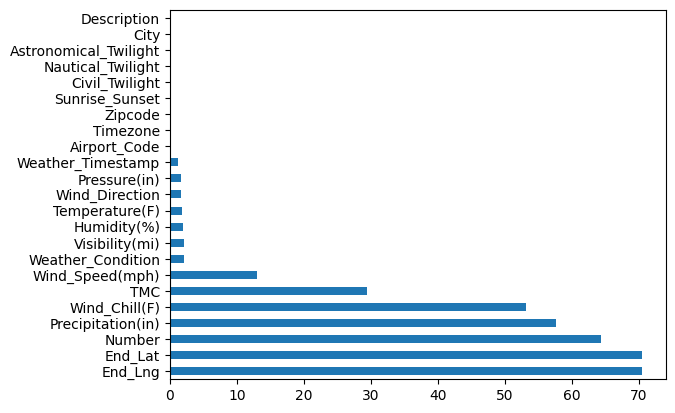

In [15]:
mis_per = df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100
mis_per[mis_per>0].plot(kind='barh')

In [16]:
top_col = mis_per[mis_per<50].index
non_null = top_col.to_list()
non_null

['TMC',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Visibility(mi)',
 'Humidity(%)',
 'Temperature(F)',
 'Wind_Direction',
 'Pressure(in)',
 'Weather_Timestamp',
 'Airport_Code',
 'Timezone',
 'Zipcode',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'City',
 'Description',
 'Country',
 'Junction',
 'Severity',
 'Start_Time',
 'End_Time',
 'Turning_Loop',
 'Traffic_Signal',
 'Traffic_Calming',
 'Stop',
 'Station',
 'Roundabout',
 'Railway',
 'No_Exit',
 'Give_Way',
 'State',
 'Crossing',
 'Bump',
 'Amenity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Street',
 'Side',
 'Source',
 'County',
 'ID']

#Removing columns with large number of null values

In [17]:
df1=df[non_null]
df1.head(2)

,TMC,Wind_Speed(mph),Weather_Condition,Visibility(mi),Humidity(%),Temperature(F),Wind_Direction,Pressure(in),Weather_Timestamp,Airport_Code,...,Bump,Amenity,Start_Lat,Start_Lng,Distance(mi),Street,Side,Source,County,ID
0,201.0,NaN,Light Rain,10.0,91.0,36.9,Calm,29.68,2016-02-08 05:58:00,KFFO,...,False,False,39.865147,-84.058723,0.01,I-70 E,R,MapQuest,Montgomery,A-1
1,201.0,NaN,Light Rain,10.0,100.0,37.9,Calm,29.65,2016-02-08 05:51:00,KCMH,...,False,False,39.928059,-82.831184,0.01,Brice Rd,L,MapQuest,Franklin,A-2


## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

Column - City

In [18]:
Cities = df1.City.unique()
Cities.shape

(11896,)

In [19]:
Cities_by_accident = df1.City.value_counts(ascending=False)
Cities_by_accident[:20]

,count
City,
Houston,101240
Los Angeles,79169
Charlotte,78952
Dallas,64790
Austin,63889
Raleigh,44675
Atlanta,41126
Oklahoma City,36340
Miami,34549


<Axes: ylabel='City'>

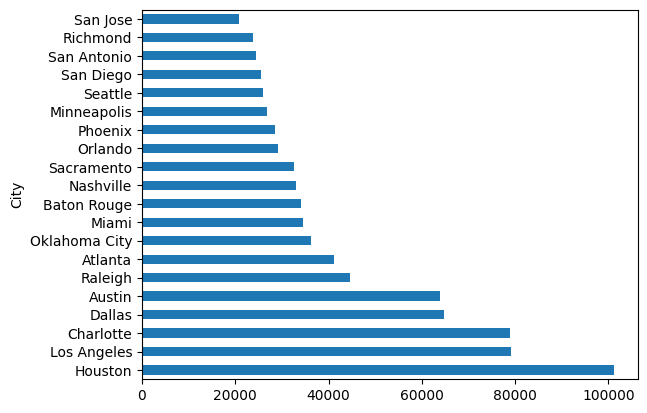

In [20]:
Cities_by_accident[:20].plot(kind='barh')

In [21]:
import seaborn as sns
sns.set_style("darkgrid")

<ipython-input-22-3489924caffb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cities_by_accident[:20])


<Axes: xlabel='count', ylabel='Density'>

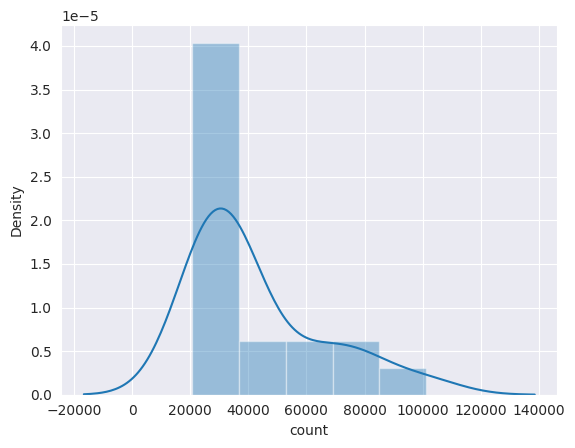

In [22]:
sns.distplot(Cities_by_accident[:20])

In [23]:
high_accident_cities = Cities_by_accident[Cities_by_accident>=1000]
low_accident_cities = Cities_by_accident[Cities_by_accident<1000]

<Axes: xlabel='count', ylabel='Count'>

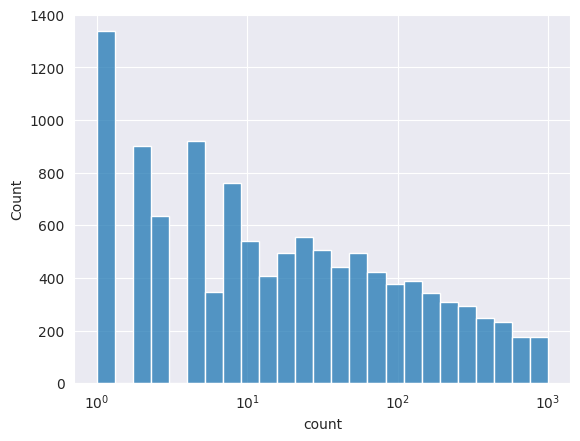

In [24]:
sns.histplot(low_accident_cities,log_scale=True)

<Axes: xlabel='count', ylabel='Count'>

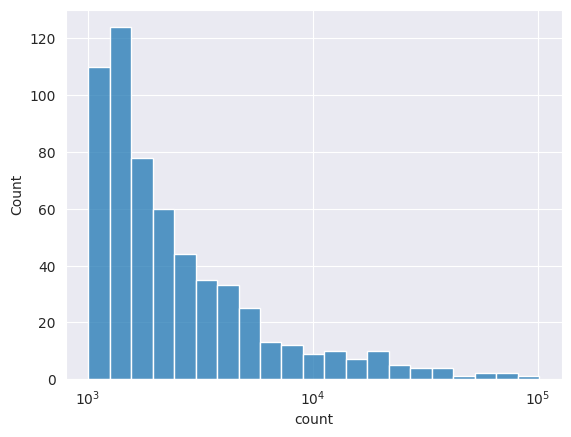

In [25]:
sns.histplot(high_accident_cities,log_scale=True)

Column 2 - Start_Time

In [26]:

df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [27]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [28]:
df['hour']=df.Start_Time.dt.hour

<ipython-input-29-a9df6803baac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='hour'>

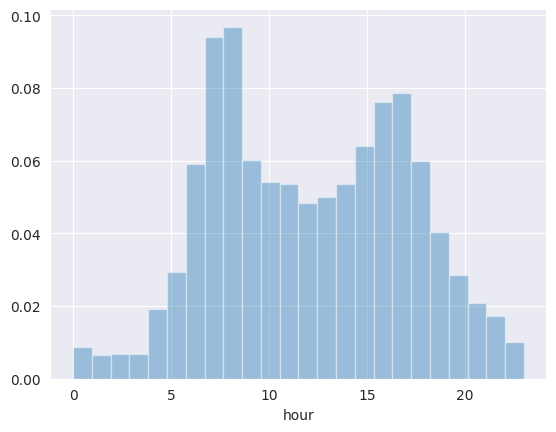

In [29]:
sns.distplot(df.hour,bins=24,kde=False,norm_hist=True)

1. A rise in accidents from 6 am to 10 am (probably people in a hurry to get to work)
2. A decline from 10 am to 3 pm
3. A rise from 3 pm to 6 pm (probably people in a hurry to get home from work)

<ipython-input-30-9a42be3cf92c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

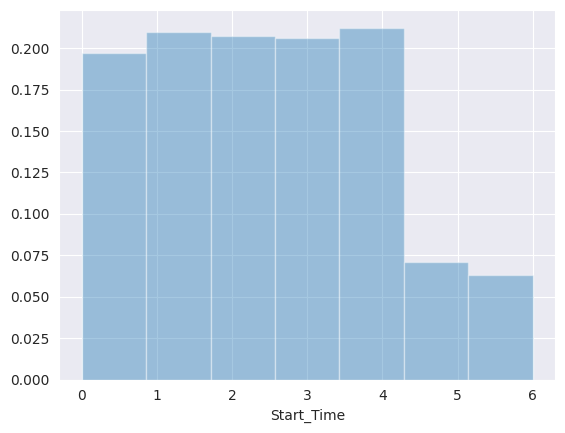

In [30]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

Number of accidents per day of the week is fairly evenly distributed and on weekends number of accidents are less.

<ipython-input-31-87b358c795f3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.start_month = df.Start_Time.dt.month
<ipython-input-31-87b358c795f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.start_month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

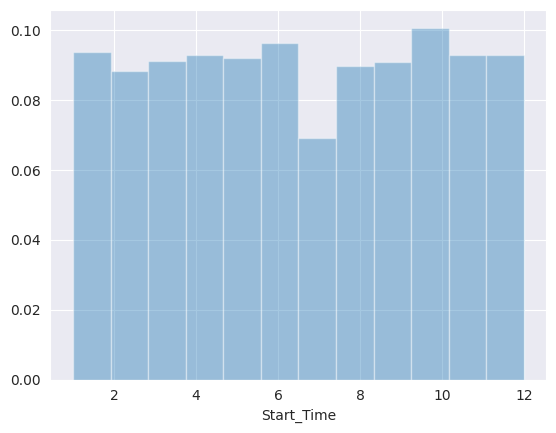

In [31]:

df.start_month = df.Start_Time.dt.month
sns.distplot(df.start_month,bins=12,kde=False,norm_hist=True)

<ipython-input-32-bbbf232e68ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time[df.Start_Time.dt.dayofweek==6].dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

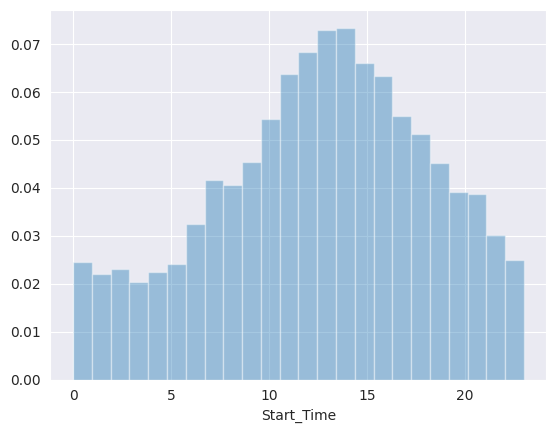

In [32]:
#sunday
sns.distplot(df.Start_Time[df.Start_Time.dt.dayofweek==6].dt.hour,bins=24,kde=False,norm_hist=True)

<ipython-input-33-38bc6c46b1e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time[df.Start_Time.dt.dayofweek==0].dt.hour,bins=24,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

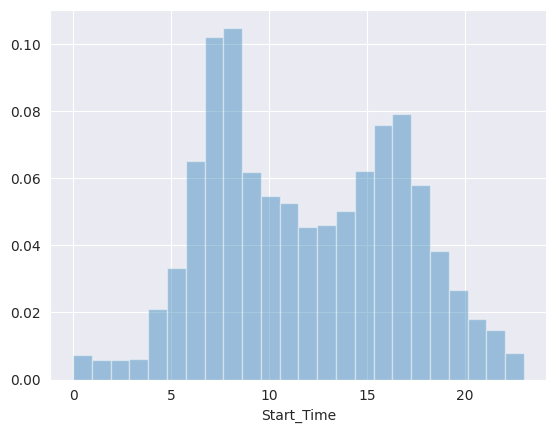

In [33]:
sns.distplot(df.Start_Time[df.Start_Time.dt.dayofweek==0].dt.hour,bins=24,kde=False,norm_hist=True)

<ipython-input-34-39eefcf49e77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time[df.Start_Time.dt.year==2018].dt.month,bins=12,kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

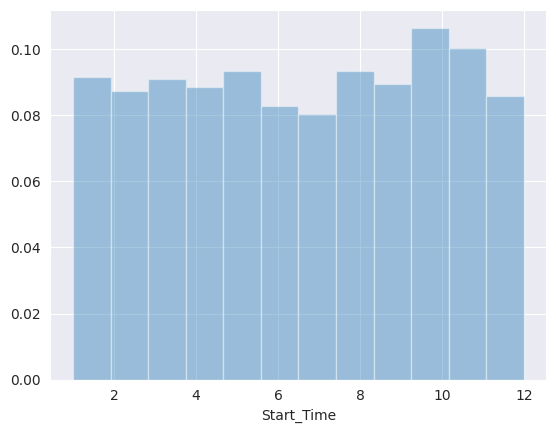

In [34]:
sns.distplot(df.Start_Time[df.Start_Time.dt.year==2018].dt.month,bins=12,kde=False,norm_hist=True)

Data is inadequate to explain accident trend over the month. 2016 and 2017 contain less data.
Data has shortcomings when biforcating sourcewise.

<Axes: ylabel='Source'>

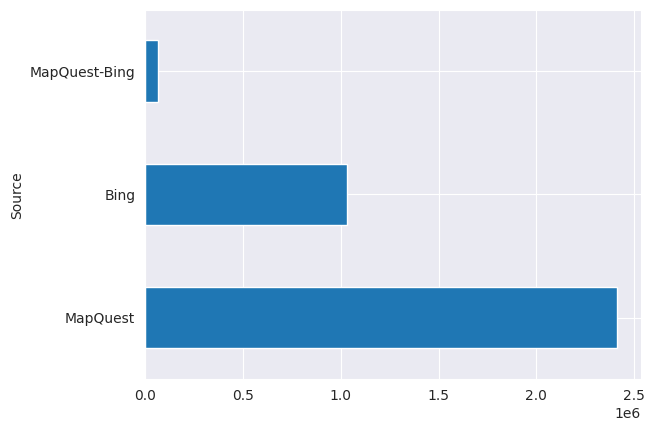

In [35]:
df.Source.value_counts().plot(kind='barh')

<Axes: ylabel='count'>

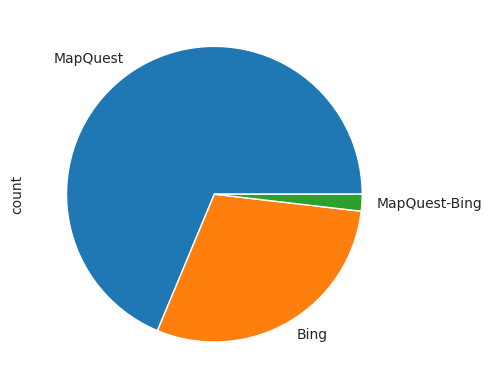

In [36]:
df.Source.value_counts().plot(kind='pie')

#Start Latitude and Longitude

<Axes: ylabel='Frequency'>

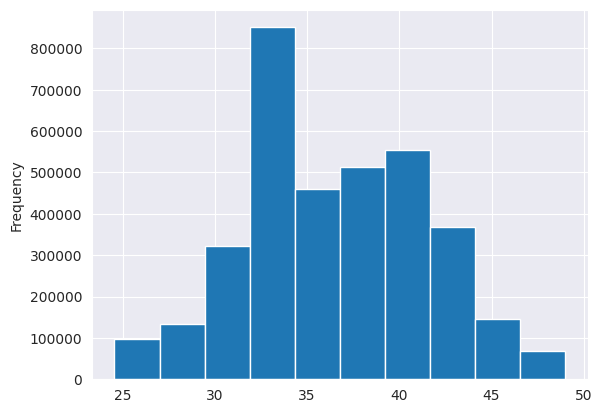

In [37]:
df.Start_Lat.plot(kind='hist')

<Axes: ylabel='Frequency'>

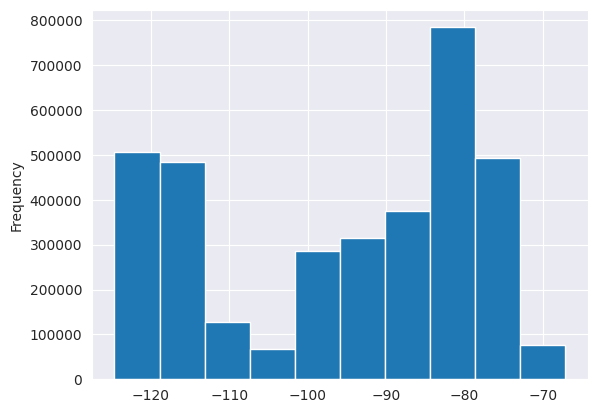

In [38]:
df.Start_Lng.plot(kind='hist')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


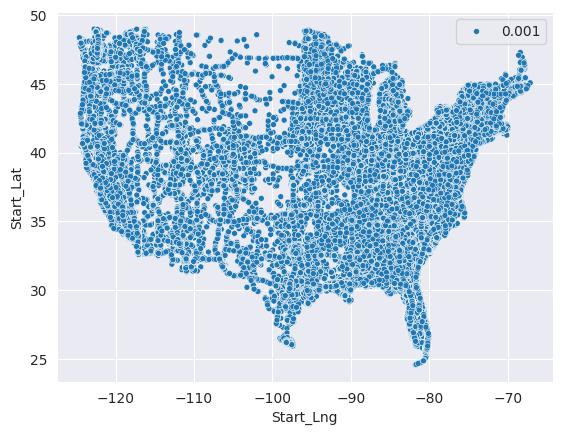

In [50]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)

In [40]:
import folium

In [41]:
from IPython.display import display

# Extract the first latitude and longitude
lat, long = df.Start_Lat.iloc[0], df.Start_Lng.iloc[0]

# Create a map centered at the first location
m = folium.Map(location=[lat, long], zoom_start=12)

# Add a marker to the map
folium.Marker((lat, long)).add_to(m)

# Display the map in Google Colab
display(m)

In [42]:
# Create a base map (centered at an approximate global location)
m = folium.Map(zoom_start=12)

# Add 100 random markers
for lat, lng in df[['Start_Lat', 'Start_Lng']].sample(100).itertuples(index=False):
    folium.Marker((lat, lng)).add_to(m)

# Display the map
display(m)

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.

In [44]:
df.nunique()

,0
ID,3513617
Source,3
TMC,21
Severity,4
Start_Time,3200042
End_Time,3246120
Start_Lat,1124695
Start_Lng,1113407
End_Lat,375074
End_Lng,383569


<Axes: ylabel='State'>

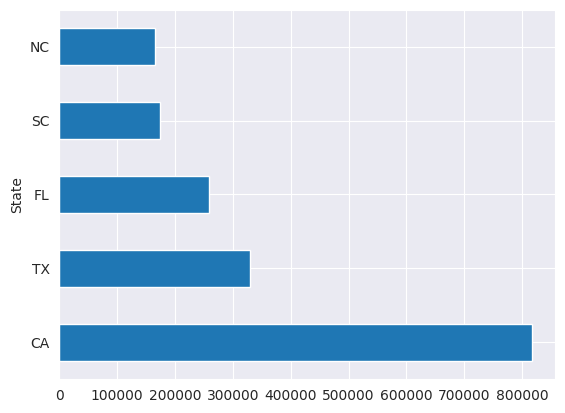

In [45]:
df.State.value_counts().sort_values(ascending=False)[:5].plot(kind='barh')

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df2 = df[:1000]
df2.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hour
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,5
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,6


In [48]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

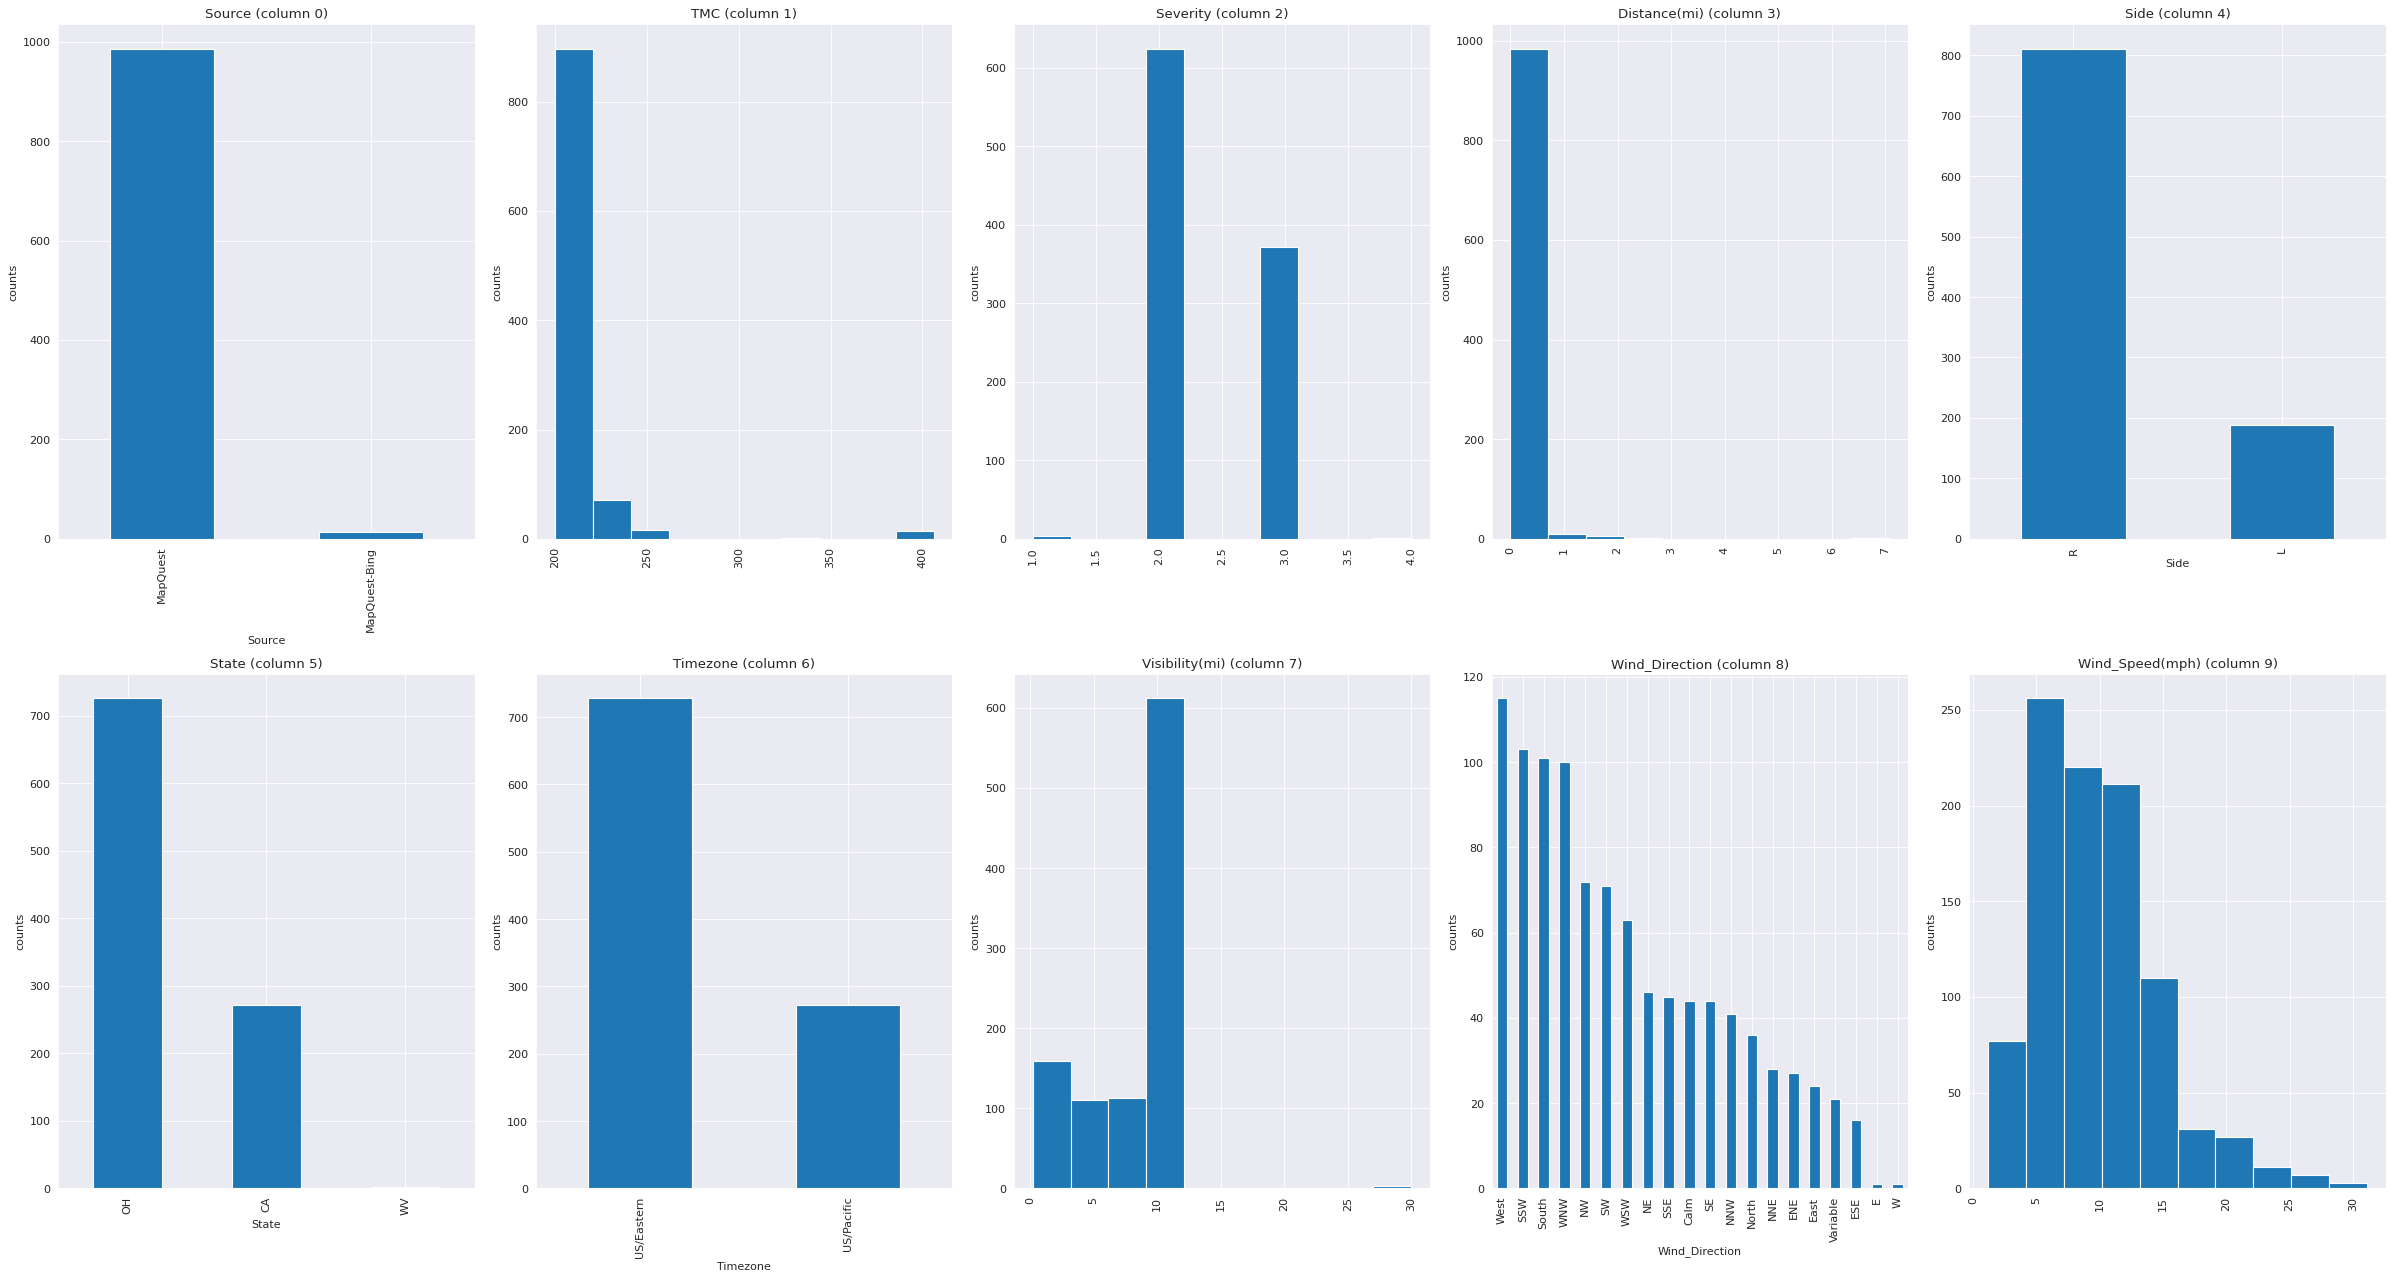

In [49]:
plotPerColumnDistribution(df2,10,5)

## Summary and Conclusion


Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)